In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = [0.9, 2.7, 6.7, 10.9, 6.0, 6.3, 7.0, 8.7, 4.8, 12.5, 
     13.4, 2.0, 3.6, 14.6]
y = [0.5, 1.1, 28.6, 32.8, 15.7, 19, 32.6, 32.3, 7.3, 33.1, 
     32.9, 0.75, 3.6, 33]

In [4]:
val = pd.DataFrame({'x':x, 'y':y})
val = val.sort_values(by='x')
val

,x,y
0,0.9,0.50
11,2.0,0.75
1,2.7,1.10
12,3.6,3.60
8,4.8,7.30
4,6.0,15.70
5,6.3,19.00
2,6.7,28.60
6,7.0,32.60
7,8.7,32.30


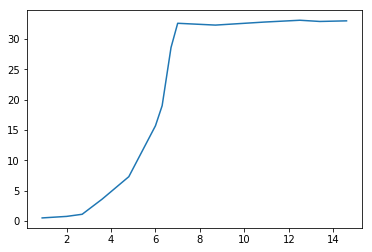

In [5]:
plt.plot(val['x'], val['y'])

In [6]:
val.describe()

,x,y
count,14.000000,14.000000
mean,7.150000,19.517857
std,4.345068,14.167618
min,0.900000,0.500000
25%,3.900000,4.525000
50%,6.500000,23.800000
75%,10.350000,32.750000
max,14.600000,33.100000


## World Development Indicators

In [7]:
import random

In [8]:
data = pd.read_csv('./Week5-Visualization/world-development-indicators/Indicators.csv')

In [9]:
data.head(5)
data.shape

(5656458, 6)

In [10]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [11]:
countries = data['CountryCode'].unique().tolist()
len(countries)

247

In [12]:
countryCodes = data['CountryName'].unique().tolist()
len(countryCodes)
type(data['CountryName'].unique())

numpy.ndarray

In [13]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [14]:
years = data['Year'].unique().tolist()
len(years)

56

In [15]:
print(min(years), max(years))

1960 2015


## Basic Plotting in Matplotlib: Part 1

In [18]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [24]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]

In [26]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


In [30]:
#dir(pd.Series)

In [35]:
years = stage['Year'].values
co2 = stage['Value'].values

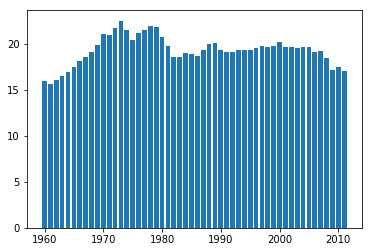

In [36]:
plt.bar(years, co2)
plt.show()

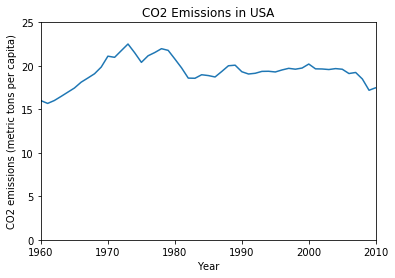

In [47]:
plt.plot(years, co2)
plt.xlabel('Year')
plt.ylabel(stage.IndicatorName.iloc[0])
plt.title('CO2 Emissions in USA')
plt.axis([1960,2010,0,25])
plt.show()

In [43]:
stage.IndicatorName.iloc[0]

'CO2 emissions (metric tons per capita)'

In [48]:
help(pd.DataFrame.loc)

Help on property:

    Purely label-location based indexer for selection by label.
    
    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.
    
    Allowed inputs are:
    
    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'`` (note that contrary
      to usual python slices, **both** the start and the stop are included!).
    - A boolean array.
    - A ``callable`` function with one argument (the calling Series, DataFrame
      or Panel) and that returns valid output for indexing (one of the above)
    
    ``.loc`` will raise a ``KeyError`` when the items are not found.
    
    See more at :ref:`Selection by Label <indexing.label>`

